Opening port: 
COM4
0b1101000011001101
0b1101000011010101
0b1101000011011101
0b1111000011011101
0b1111000011011101
0b1111000011011101
0b1111000011011101
0b0010111010101101
0b0100100001010011
0b1100011101000010
0b1100011101000010
0b1100011101000010
0b1100011001000010
0b1100011101000010
0b1100011100111010
0b1100011100111010
0b1100011100111010
0b1100011000111010
0b1100011000111010
0b1100011000111010
0b1100011000111010
0b1100011000111010
0b1100011000111010
0b1100011000111010
0b1010011000111010
0b1100011000111010
0b1100011100111010
0b1100011000111010
0b1100011000111010
0b1010011000111010
0b1100011100111010
0b1010011100111010
0b1010011000111010
0b1010011000111010
0b1010011000111010
0b1100011000111010
0b1010011000111010
0b1010011000111010
0b1010011000111010
0b1010011000111010
0b1010011001000010
0b1010011101000010
0b1000100001100011
0b0110111010111101
0b1111000011010101
0b1101000011010101
0b1101000011010101
0b1101000011010101
0b1011000011001101
0b1010111111001101
0b1000111111001101
0b100011111

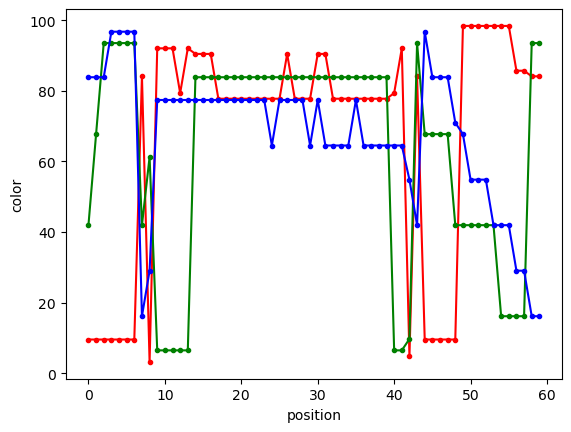

In [77]:
import numpy as np
# get a line of raw bitmap and plot the components
import serial
ser = serial.Serial('COM4',230400) # the name of your Pico port
print('Opening port: ')
print(ser.name)

ser.write(b'hi\r\n') # send a newline to request data
data_read = ser.read_until(b'\n',50) # read the echo

sampnum = 0
index = 0
raw = []
reds = []
greens = []
blues = []
bright = []

# Pico sends back index and raw pixel value
while sampnum < 60: # width of bitmap
    data_read = ser.read_until(b'\n',50) # read until newline
    data_text = str(data_read,'utf-8') # convert bytes to string
    data = list(map(int,data_text.split())) # convert string to values

    if(len(data)==2):
        index = data[0]
        raw.append(data[1])
        reds.append(((data[1]>>5)&0x3F)/0x3F*100) # red value is middle 6 bits
        greens.append((data[1]&0x1F)/0x1F*100) # green value is rightmost 5 bits
        blues.append(((data[1]>>11)&0x1F)/0x1F*100) # blue vale is leftmost 5 bits
        bright.append((data[1]&0x1F)+((data[1]>>5)&0x3F)+((data[1]>>11)&0x1F)) # sum of colors
        sampnum = sampnum + 1

# print the raw color as a 16bit binary to double check bitshifting
for i in range(len(reds)):
    print(f"{raw[i]:#018b}")

COM = np.zeros([3,1])
for i in range(60):
    COM[0] += (reds[i]*i) / np.sum(reds)
    COM[1] += (greens[i]*i) / np.sum(greens)
    COM[2] += (blues[i]*i) / np.sum(blues)
print(COM)

# plot the colors 
import matplotlib.pyplot as plt 
x = range(len(reds)) # time array
plt.plot(x,reds,'r.-',x,greens,'g.-',x,blues,'b.-')
plt.ylabel('color')
plt.xlabel('position')
plt.show()

# be sure to close the port
ser.close()